In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_excel("/content/30_assets_5Years.xlsx")
df=df.iloc[:,1:]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return,Rate_Return,Asset,Expected_Rate_return,Deviation
0,2019-01-01,386.299988,402.700012,292.100006,338.649994,326.550171,84534851,0.000000,0.000000,ADANIPORTS.NS,0.024666,-0.024666
1,2019-02-01,339.899994,359.250000,315.750000,325.850006,314.207550,133558828,-12.342621,-0.037797,ADANIPORTS.NS,0.024666,-12.367286
2,2019-03-01,328.799988,385.899994,327.000000,378.149994,364.638855,70090763,50.431305,0.160503,ADANIPORTS.NS,0.024666,50.406639
3,2019-04-01,380.950012,396.549988,373.000000,392.799988,378.765411,45592283,14.126556,0.038741,ADANIPORTS.NS,0.024666,14.101891
4,2019-05-01,392.799988,430.600006,359.100006,416.399994,401.522186,119239950,22.756775,0.060081,ADANIPORTS.NS,0.024666,22.732109


In [ ]:
cov=pd.read_excel('/content/covariance_matrix.xlsx')
cov.head()

,Unnamed: 0,ADANIPORTS.NS_deviation,ASIANPAINT.NS_deviation,AXISBANK.NS_deviation,BAJFINANCE.NS_deviation,BHARTIARTL.NS_deviation,BRITANNIA.NS_deviation,DRREDDY.NS_deviation,HCLTECH.NS_deviation,HDFCBANK.NS_deviation,...,ONGC.NS_deviation,POWERGRID.NS_deviation,RELIANCE.NS_deviation,SBIN.NS_deviation,SUNPHARMA.NS_deviation,TCS.NS_deviation,TECHM.NS_deviation,TITAN.NS_deviation,ULTRACEMCO.NS_deviation,WIPRO.NS_deviation
0,ADANIPORTS.NS_deviation,3704.997339,6397.266716,1950.756308,17327.302595,997.502332,3920.390644,726.196103,1059.973103,2592.821642,...,230.581968,242.886048,4228.297687,1296.102438,949.213179,2851.411619,1339.067830,4786.991282,15009.645254,573.029551
1,ASIANPAINT.NS_deviation,6397.266716,36380.847708,2609.157920,53545.876021,929.684584,17316.767593,9821.237664,4741.532660,4574.106452,...,3.665376,236.043705,6884.392821,1697.271196,3260.561799,11223.231494,6517.770479,17112.493534,35815.503719,2304.570945
2,AXISBANK.NS_deviation,1950.756308,2609.157920,4660.715827,26006.120349,1312.610759,4652.984151,-1606.411613,1095.177489,4315.473993,...,353.393154,211.172017,3129.442494,1626.147242,1102.564475,3548.310164,1800.352114,5615.475843,12524.686384,266.919257
3,BAJFINANCE.NS_deviation,17327.302595,53545.876021,26006.120349,334241.731563,9493.378446,47046.434375,-12527.576078,8423.949650,31465.804263,...,1635.259391,1492.953648,22719.099338,11595.925903,7269.472319,26492.784112,20785.796355,55069.439054,97245.625854,5400.234130
4,BHARTIARTL.NS_deviation,997.502332,929.684584,1312.610759,9493.378446,1686.938916,2282.562644,602.183044,527.657580,1297.211201,...,146.909643,134.182186,1771.211425,571.906714,847.584131,1821.250841,605.623382,1888.521818,4997.404475,142.843055


In [ ]:
asset_group=df.groupby('Asset')
mean_returns=[]
returns=[]
returns_2d=[]
for asset,asset_df in asset_group:
  asset_df['Expected_Return']=asset_df['Rate_Return'].mean()
  mean_returns.append(asset_df['Expected_Return'].iloc[0])
  returns_2d.append(asset_df['Return'].tolist())
  for i in range(len(asset_df)):
      returns.append(asset_df['Rate_Return'].iloc[i])
returns_array = np.array(returns_2d)
returns_array=returns_array.T
print("Returns Array:\n", returns_array)

Returns Array:
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.23426208e+01 -7.07482910e+00 -1.30767822e+01 ...  2.84578857e+01
   2.99036133e+02  5.43334961e-01]
 [ 5.04313049e+01  8.36527100e+01  6.73226929e+01 ...  1.12911499e+02
   1.67310303e+02 -2.14251709e+01]
 ...
 [-4.02274780e+01 -1.63479980e+02 -5.48076782e+01 ...  4.07165527e+01
   1.66414062e+02 -2.41983948e+01]
 [ 4.05759277e+01  1.22795410e+02  9.23287964e+01 ...  2.99968506e+02
   5.77972656e+02  3.11835022e+01]
 [ 1.98000488e+02  2.85177490e+02  2.80283203e+01 ...  1.84247070e+02
   1.49055957e+03  5.81260376e+01]]


#Visualizing the distribution of Return rate

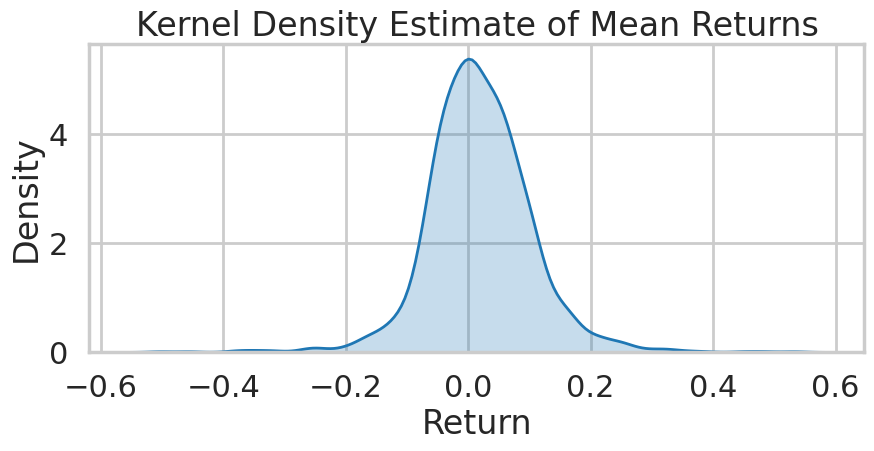

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster")

plt.figure(figsize=(10, 4))
sns.kdeplot(returns, fill=True)
plt.title("Kernel Density Estimate of Mean Returns")
plt.xlabel("Return")
plt.ylabel("Density")
plt.show()

In [ ]:
mean_returns=np.array(mean_returns)
mean_returns


array([0.02425444, 0.01802578, 0.01300249, 0.02728716, 0.0247416 ,
       0.01228856, 0.0158652 , 0.02381472, 0.01142339, 0.01435536,
       0.00992005, 0.02137675, 0.01726774, 0.01374505, 0.02833436,
       0.0099804 , 0.02173088, 0.02236316, 0.01152246, 0.01643489,
       0.01689568, 0.02027807, 0.01742312, 0.02017806, 0.02200297,
       0.01417325, 0.01588983, 0.02633714, 0.02136567, 0.01268131])

In [ ]:
cov=cov.iloc[:,1:]/1e4

In [ ]:
returns=df['Return']
returns=np.array(returns)
returns

array([  0.        , -12.34262085,  50.43130493, ..., -24.19839478,
        31.1835022 ,  58.1260376 ])

# MAD

In [ ]:
import cvxpy as cp
n = len(mean_returns)
T=returns_array.shape[0]

e=np.ones((n,1))

mu = mean_returns

# Define variables
w = cp.Variable(n)
y = cp.Variable(T)

# Objective
objective = cp.Minimize(1/T * cp.sum(y))

deviation=returns_array-mu.reshape(1,-1)

# Constraints
constraints = [
    deviation @ w <= y,
    -deviation @ w <= y,
     e.T@w== 1
]

# Problem
problem = cp.Problem(objective, constraints)
result = problem.solve()

# Output optimized asset weights
print("Optimized weights:", w.value)
optimal_return=mu@w.value
print("Optimal Return for MAD Model:", optimal_return)
L1_risk=1/T*np.sum(y.value)
print("L1 Risk for MAD Model:", L1_risk)


Optimized weights: [-8.39159390e-03  7.29791497e-03  4.25285981e-02 -3.87292089e-04
  5.41485584e-03  5.25262149e-03 -3.81282426e-03 -2.01629648e-02
 -8.34681715e-03 -1.62175623e-03  1.26217356e-02  6.18022439e-02
  2.55110429e-02  1.29749789e-01 -5.09922628e-03 -1.82143396e-02
 -2.80494906e-02 -7.51951591e-03 -2.56089755e-04  1.14922515e-02
  3.28470053e-01  5.02030137e-01 -4.92791579e-04 -9.34356158e-02
 -4.59980754e-03 -2.32170118e-02 -1.46075151e-02 -1.07983175e-02
 -4.66378699e-03  1.21505514e-01]
Optimal Return for MAD Model: 0.01709229605533306
L1 Risk for MAD Model: 2.312957182755095


#MINIMAX

In [ ]:
n=len(mean_returns)
w=cp.Variable(n)
z=cp.Variable()
max_risk=0.05
constraints = [e.T@w == 1, w >= 0, cp.quad_form(w, cov) <= max_risk]
constraints.append(mean_returns @ w <= z)
objective = cp.Minimize(z)
prob = cp.Problem(objective, constraints)
prob.solve()

optimal_weights = w.value
minimax_risk = optimal_weights.T @ cov @ optimal_weights
opt_return = z.value

print("Optimal Return for MINIMAX Model: ", opt_return)

print("Optimal Weights for MINIMAX Model: \n", optimal_weights)

print("Risk for MINIMAX Model: ", minimax_risk)

Optimal Return for MINIMAX Model:  0.012862987368725126
Optimal Weights for MINIMAX Model: 
 [5.07026311e-09 4.62209767e-09 9.81946927e-08 1.42160085e-09
 5.69779892e-09 8.09181483e-09 6.73368766e-09 4.90728758e-09
 2.20615137e-02 1.08405537e-08 5.84562400e-02 7.13098216e-09
 9.80825232e-09 4.71158946e-01 4.09333469e-09 4.82603431e-02
 4.50197954e-09 6.02318327e-09 4.42054188e-09 1.10943725e-08
 2.24191556e-08 1.09996048e-08 8.12105053e-09 9.43971588e-09
 6.64095185e-09 8.39239779e-09 1.07828157e-08 3.12835629e-09
 2.08672172e-09 4.00062683e-01]
Risk for MINIMAX Model:  0.049999997638420814


# VaR Estimation

In [ ]:
confidence_level = 0.95
losses = -mean_returns
VaR = np.percentile(losses, (1 - confidence_level) * 100)
print("Value-at-Risk (VaR) for MAD Model:", VaR)

Value-at-Risk (VaR) for MAD Model: -0.026859651001247323


#CVaR Estimation

In [ ]:
CVaR = losses[losses <= VaR].mean()
print(f"Conditional Value at Risk (CVaR) for 95% confidence level : {CVaR}")

Conditional Value at Risk (CVaR) for 95% confidence level : -0.027810757604855487
